In [1]:
import numpy as np
import simple_wta
import ahuja
import spectral_clustering
import kmeans_clustering
import regret_matching
from time import perf_counter
from matplotlib import pyplot as plt
%matplotlib inline
rng = np.random.RandomState(seed=1)

In [2]:
n_w,n_t = (100,100)
rng = np.random.RandomState(seed=0)
prob = simple_wta.random_wta_factory(n_w,n_t,rng=rng)
x = simple_wta.greedy(prob)

In [3]:
rng = np.random.RandomState(seed=2)
# n_c = [10,11,12,13,14,15,16,17,18]
n_c = [10,12,14,16,18,20]
n_w = [n**2 for n in n_c]
n_t = [int(3*n/4) for n in n_w]

x_greedy = []
t_greedy = []
x_ahuja = []
t_ahuja = []
x_spectral = []
t_spectral = []
spectral_cluster_data = []
x_kmeans = []
t_kmeans = []
kmeans_cluster_data = []

prob = [simple_wta.random_wta_factory(n_w[i],n_t[i],rng=rng) for i in range(len(n_c))]

for i in range(len(n_c)):
    t0 = perf_counter()
    x_greedy.append(simple_wta.greedy(prob[i]))
    t_greedy.append(perf_counter()-t0)
    t0 = perf_counter()
    x_ahuja.append(ahuja.optimize(prob[i],maxiters=1000,ftol_abs=1e-12))
    t_ahuja.append(perf_counter()-t0)
    # t0 = perf_counter()
    # spectral_cluster_data.append(spectral_clustering.reduce_problem(prob[i],n_c[i],rng=rng))
    # x_spectral.append([ahuja.optimize(p,maxiters=1000,ftol_abs=1e-12) for p in spectral_cluster_data[-1][0]])
    # t_spectral.append(perf_counter()-t0)
    t0 = perf_counter()
    kmeans_cluster_data.append(kmeans_clustering.reduce_problem(prob[i],n_c[i],rng=rng))
    x_kmeans.append([ahuja.optimize(p,maxiters=1000,ftol_abs=1e-12) for p in kmeans_cluster_data[-1][0]])
    t_kmeans.append(perf_counter()-t0)


c:\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)
c:\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)
c:\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

GRAPH IS EMPTY DURING ASSIGNMENT UPDATE!!


c:\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)
c:\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, order=order, subok=subok, copy=True)
c:\Python39\lib\site-packages\numpy\lib\function_base.py:959: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [4]:
f_greedy = [prob[i].max_objective(x_greedy[i]) for i in range(len(n_c))]
c_greedy = [prob[i].objective(x_greedy[i]) for i in range(len(n_c))]
f_ahuja = [prob[i].max_objective(x_ahuja[i]) for i in range(len(n_c))]
c_ahuja = [prob[i].objective(x_ahuja[i]) for i in range(len(n_c))]
# f_spectral = [np.sum([spectral_cluster_data[i][0][j].max_objective(x_spectral[i][j]) for j in range(n_c[i])]) for i in range(len(n_c))]
# c_spectral = [np.sum([spectral_cluster_data[i][0][j].objective(x_spectral[i][j]) for j in range(n_c[i])]) for i in range(len(n_c))]
f_kmeans= [np.sum([kmeans_cluster_data[i][0][j].max_objective(x_kmeans[i][j]) for j in range(n_c[i])]) for i in range(len(n_c))]
c_kmeans = [np.sum([kmeans_cluster_data[i][0][j].objective(x_kmeans[i][j]) for j in range(n_c[i])]) for i in range(len(n_c))]


In [60]:
print(f_kmeans)
print(f_spectral)

[ 35.49242532  50.99443036  78.34358971  96.77947178 115.69730974
 162.31898363]
[ 35.57542196  50.6645153   78.17173276  96.84515966 115.24624926
 162.15072727]


In [6]:

f_random_avg = []
f_random_std= []
c_random_avg= []
c_random_std = []
t_random_avg = []
t_random_std= []
rng = np.random.RandomState(seed=0)
for i in range(len(n_c)):
    f = []
    c = []
    t = []
    for j in range(100):
        t0 = perf_counter()
        sub_probs, weapons, targets = spectral_clustering.random_reduction(prob[i],n_c[i],rng=rng)
        x = [ahuja.optimize(p,maxiters=1000,ftol_abs=1e-12) for p in sub_probs]
        t.append(perf_counter()-t0)
        f.append(np.sum([sub_probs[i].max_objective(x[i]) for i in range(n_c[i])]))
        c.append(np.sum([sub_probs[i].objective(x[i]) for i in range(n_c[i])]))
    f_random_avg.append(np.average(f))
    f_random_std.append(np.std(f))
    c_random_avg.append(np.average(c))
    c_random_std.append(np.std(c))
    t_random_avg.append(np.average(t))
    t_random_std.append(np.std(t))

GRAPH IS EMPTY DURING ASSIGNMENT UPDATE!!
GRAPH IS EMPTY DURING ASSIGNMENT UPDATE!!
Ended at maximum iterations
GRAPH IS EMPTY DURING ASSIGNMENT UPDATE!!
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
GRAPH IS EMPTY DURING ASSIGNMENT UPDATE!!
GRAPH IS EMPTY DURING ASSIGNMENT UPDATE!!
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended at maximum iterations
Ended 

In [7]:
# convert data to numpy arrays
f_random_avg = np.array(f_random_avg) 
f_random_std= np.array(f_random_std)
c_random_avg= np.array(c_random_avg)
c_random_std = np.array(c_random_std)
t_random_avg = np.array(t_random_avg)
t_random_std = np.array(t_random_std)
f_greedy = np.array(f_greedy)
c_greedy = np.array(c_greedy)
f_ahuja = np.array(f_ahuja)
c_ahuja = np.array(c_ahuja)
# f_spectral = np.array(f_spectral)
# c_spectral = np.array(c_spectral)
f_kmeans = np.array(f_kmeans)
c_kmeans = np.array(c_kmeans)


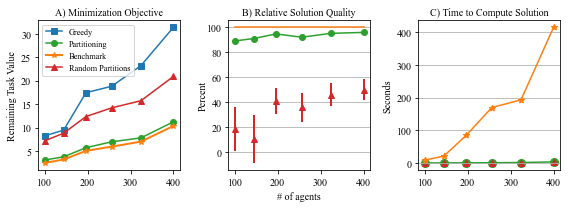

In [91]:
# fig,axs = plt.subplots(2,2,sharex=True)
import matplotlib
matplotlib.rcParams["font.family"] = ["serif"]
matplotlib.rcParams["font.serif"] = ["Times New Roman"]
fig, axs = plt.subplots(1,3,figsize=(8,3))
# gs = fig.add_gridspec(1,3,wspace=.25,hspace=.4)
# axs = [fig.add_subplot(gs[0,0]),fig.add_subplot(gs[0,1]),fig.add_subplot(gs[1,0])]

axs[0].plot(n_w, c_greedy, marker="s", linewidth=1.5, markersize=6, color="C0")
axs[0].plot(n_w, c_kmeans, marker="o", linewidth=1.5, markersize=6, color="C2")
# axs[0].plot(n_w, c_spectral, marker="o", linewidth=2, markersize=8, color="C2")
axs[0].plot(n_w, c_ahuja, marker="*", linewidth=2, markersize=6, color="C1")
axs[0].plot(n_w, c_random_avg, marker="^", color="C3", markersize=6, linewidth=1.5)
axs[0].legend(["Greedy","Partitioning", "Benchmark", "Random Partitions"], 
                bbox_to_anchor=(0,1),loc="upper left",fontsize="small")
axs[0].set_title("A) Minimization Objective",fontsize="medium")
axs[0].set_ylabel("Remaining Task Value", fontsize="medium")

axs[1].plot([],[],marker="s")
axs[1].plot(n_w, 100*(c_greedy-c_ahuja)/(c_greedy-c_ahuja),color="C1", linewidth=1.5)
axs[1].plot(n_w, 100*(c_greedy-c_kmeans)/(c_greedy-c_ahuja),color="C2", linewidth=1.5, marker="o", markersize=6)
# axs[1].plot(n_w, 100*(c_greedy-c_spectral)/(c_greedy-c_ahuja),color="C2", linewidth=2, marker="o", markersize=8)
axs[1].errorbar(n_w, 100*(c_greedy-c_random_avg)/(c_greedy-c_ahuja), 100*(c_random_std)/(c_greedy-c_ahuja), fmt="^", color="C3", linewidth=2, markersize=6)
axs[1].set_xlabel("# of agents", fontsize="medium")
axs[1].set_ylabel("Percent", fontsize="medium", labelpad=-1)
# axs[1].yaxis.set_label_position("right")
axs[1].set_title("B) Relative Solution Quality",fontsize="medium")
axs[1].grid(visible=True,axis="y")

axs[2].plot(n_w, t_kmeans, color="C2", linewidth=1.5, marker="o", markersize=8,zorder=1)
# axs[2].plot(n_w, t_spectral, color="C2", linewidth=2, marker="o", markersize=10,zorder=1)
axs[2].scatter(n_w, t_random_avg, marker="^", s=6**2, color="C3",)
axs[2].scatter(n_w, t_ahuja, marker="*", s=6**2, color="C1")
axs[2].plot(n_w,t_ahuja,marker="*",markersize=6,color="C1",linewidth=1.5)
# axs[2].set_xlabel("# of weapons")
axs[2].set_ylabel("Seconds", fontsize="medium")
axs[2].set_title("C) Time to Compute Solution", fontsize="medium")
axs[2].grid(visible=True, axis="y")
plt.tight_layout()
plt.savefig("figures/hero_fig.png",dpi=1000)

Text(0, 0.5, 'Remaining Task Value')

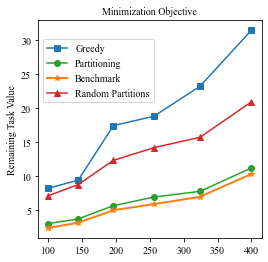

In [74]:
# This figure is too busy, we are going to break it up into two figures

fig, axs = plt.subplots(1,1,figsize=(4,4))
axs.plot(n_w, c_greedy, marker="s", linewidth=1.5, markersize=6, color="C0")
axs.plot(n_w, c_kmeans, marker="o", linewidth=1.5, markersize=6, color="C2")
axs.plot(n_w, c_ahuja, marker="*", linewidth=2, markersize=6, color="C1")
axs.plot(n_w, c_random_avg, marker="^", color="C3", markersize=6, linewidth=1.5)
axs.legend(["Greedy","Partitioning", "Benchmark", "Random Partitions"], 
                bbox_to_anchor=(0,.6),loc="lower left",fontsize="medium")
axs.set_title("Minimization Objective",fontsize="medium")
axs.set_ylabel("Remaining Task Value", fontsize="medium")

In [96]:
100*(c_greedy-c_kmeans)/(c_greedy-c_ahuja)
np.array(t_ahuja)/np.array(t_kmeans)
t_kmeans

[0.22959550000000029,
 0.4700962000000004,
 0.6999602000000067,
 0.9926841999999851,
 1.603147300000046,
 3.544544299999984]